In [ ]:
!pip install datapane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 KB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.9/505.9 KB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 38.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.express as px
import datapane as dp
from datetime import datetime as dt


#Reading data from Yahoofinance website directly

ticker =["GOOG","AAPL","MSFT","AMZN"]
Companies = ['google','apple','microsoft','amazon']
end = dt.now()
start = dt(end.year-1,end.month,end.day)
print(end,start)
stocks = {}
#Pulling Tesla stokc price data using Tesla ticker TSLA and store it under tsla
for (tick,i) in zip(ticker,Companies):
  stocks[tick]= yf.download(tick , start=start,end = end)
  stocks[tick]["Company"] = i

#stocks["GOOG"].head()

2023-04-02 17:24:25.779003 2022-04-02 00:00:00
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:

def update_data():
  data = []
  data = pd.DataFrame(data)
  for i in ticker:
     data = pd.concat([data,stocks[i]])
  return data

data = update_data()
data.head()

,Open,High,Low,Close,Adj Close,Volume,Company
Date,,,,,,,
2022-04-04,140.824493,144.043747,140.824493,143.642502,143.642502,19076000,google
2022-04-05,143.399506,143.589996,140.943497,141.063004,141.063004,19256000,google
2022-04-06,139.161499,139.848495,136.418106,137.175995,137.175995,23574000,google
2022-04-07,136.617996,137.701508,134.857254,136.464996,136.464996,19448000,google
2022-04-08,136.250000,136.250000,133.752502,134.010498,134.010498,16434000,google


In [ ]:
#data cleaning 

for i in range(len(data.keys())):
   if(data.isnull().sum()[i]!=0):
    data.dropna()
    print("Nan dropped")
print("no Null values")  # checking for NaN values    

data.drop_duplicates()
print("no duplicates") # dropping duplicate rows/data

no Null values
no duplicates


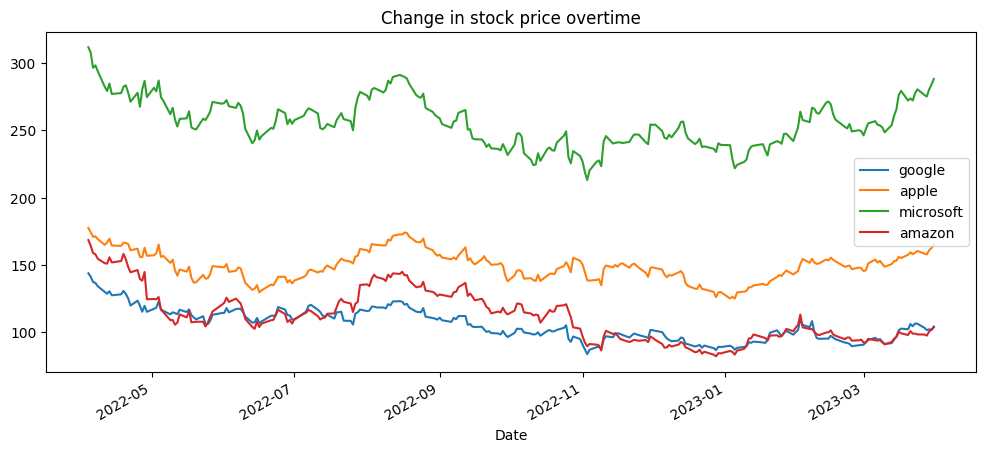

In [ ]:
#Change in stock price overtime


grouped = data.groupby('Company')
fig, ax = plt.subplots(figsize=(12,5))


for comp in Companies:
    stock = grouped.get_group(comp)
    #df = df + px.data.stock
    #fig = px.line(x=stock.index,y=stock['Adj Close'],title='Adj close')
#    sns.lineplot(x=stock.index, y=stock['Adj Close'],ax=ax)
    #print(stock["Company"].head(),stock["Date"].head())
    stock['Adj Close'].plot( legend=True,  ax=ax,  title="Change in stock price overtime" )

#fig.show()
ax.legend(['google','apple','microsoft','amazon'])



In [ ]:
print("**********INFERENCE OF CHANGE IN STOCK PRICE OVERTIME***********\n\n")

for tick in ticker:
  print("The stock price of ",tick ,"peaked at :",stocks[tick]['Adj Close'].idxmax(), "\n which is",":"  ,stocks[tick]['Adj Close'].max())
  print("The stock price of ",tick ,"is least at :",stocks[tick]['Adj Close'].idxmin(), "\n which is",":"  ,stocks[tick]['Adj Close'].min())

**********INFERENCE OF CHANGE IN STOCK PRICE OVERTIME***********


The stock price of  GOOG peaked at : 2022-04-04 00:00:00 
 which is : 143.6425018310547
The stock price of  GOOG is least at : 2022-11-03 00:00:00 
 which is : 83.48999786376953
The stock price of  AAPL peaked at : 2022-04-04 00:00:00 
 which is : 177.36558532714844
The stock price of  AAPL is least at : 2023-01-05 00:00:00 
 which is : 124.82939910888672
The stock price of  MSFT peaked at : 2022-04-04 00:00:00 
 which is : 311.9100646972656
The stock price of  MSFT is least at : 2022-11-03 00:00:00 
 which is : 213.11412048339844
The stock price of  AMZN peaked at : 2022-04-04 00:00:00 
 which is : 168.34649658203125
The stock price of  AMZN is least at : 2022-12-28 00:00:00 
 which is : 81.81999969482422


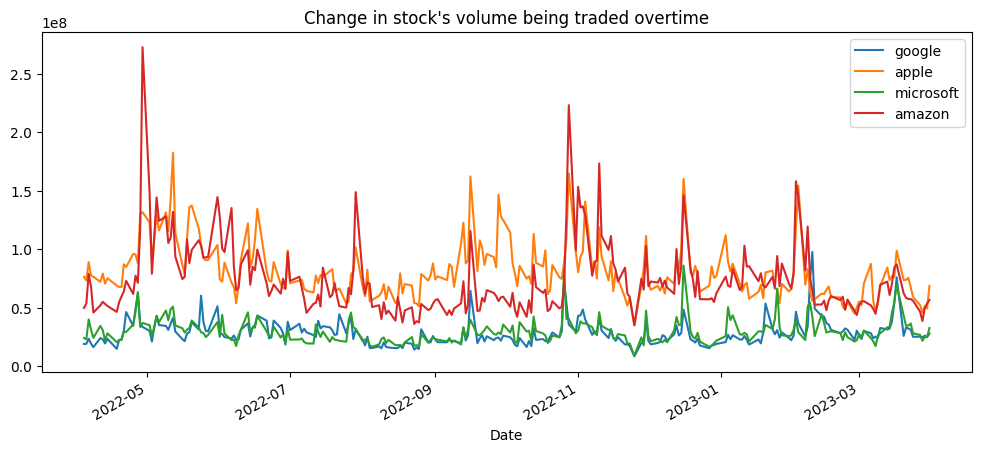

In [ ]:
#Change in stock's volume being traded overtime


grouped = data.groupby('Company')
fig, ax = plt.subplots(figsize=(12,5))

for comp in Companies:
    stock = grouped.get_group(comp)
    #print(stock["Company"].head(),stock["Date"].head())
    stock['Volume'].plot( legend=True,  ax=ax,  title="Change in stock's volume being traded overtime" )

ax.legend(Companies)

In [ ]:
print("**********INFERENCE OF CHANGE IN STOCK's VOLUME BEING TRADED OVERTIME***********\n\n")

for tick in ticker:
  print("The stock price of ",tick ,"peaked at :",stocks[tick]['Volume'].idxmax(), "\n which is",":"  ,stocks[tick]['Volume'].max())
  print("The stock price of ",tick ,"is least at :",stocks[tick]['Volume'].idxmin(), "\n which is",":"  ,stocks[tick]['Volume'].min())

**********INFERENCE OF CHANGE IN STOCK's VOLUME BEING TRADED OVERTIME***********


The stock price of  GOOG peaked at : 2023-02-09 00:00:00 
 which is : 97798600
The stock price of  GOOG is least at : 2022-11-25 00:00:00 
 which is : 8567800
The stock price of  AAPL peaked at : 2022-05-12 00:00:00 
 which is : 182602000
The stock price of  AAPL is least at : 2022-11-25 00:00:00 
 which is : 35195900
The stock price of  MSFT peaked at : 2022-12-16 00:00:00 
 which is : 86102000
The stock price of  MSFT is least at : 2022-11-25 00:00:00 
 which is : 9200800
The stock price of  AMZN peaked at : 2022-04-29 00:00:00 
 which is : 272662000
The stock price of  AMZN is least at : 2022-11-25 00:00:00 
 which is : 35088600


In [ ]:
#moving average of various stocks

period = [10,25,50]

for i in ticker:
  for p in period:
    col_name = "ma_for_%s_days"%str(p )
    stocks[i][col_name] = stocks[i]['Adj Close'].rolling(window=p,min_periods=None ,center=False).mean()

for i in ticker:
  print("**********",i,"***********\n")
  print(stocks[i]['ma_for_10_days'].tail(),stocks[i]['ma_for_25_days'].tail(),stocks[i]['ma_for_50_days'].tail(),"\n")

********** GOOG ***********

Date
2023-03-27    102.170
2023-03-28    102.881
2023-03-29    103.416
2023-03-30    103.441
2023-03-31    103.595
Name: ma_for_10_days, dtype: float64 Date
2023-03-27    96.1176
2023-03-28    96.4900
2023-03-29    96.8940
2023-03-30    97.3040
2023-03-31    97.8900
Name: ma_for_25_days, dtype: float64 Date
2023-03-27    97.2482
2023-03-28    97.4194
2023-03-29    97.6142
2023-03-30    97.8050
2023-03-31    98.0068
Name: ma_for_50_days, dtype: float64 

********** AAPL ***********

Date
2023-03-27    156.839999
2023-03-28    157.345999
2023-03-29    158.123999
2023-03-30    158.774998
2023-03-31    159.764998
Name: ma_for_10_days, dtype: float64 Date
2023-03-27    152.2936
2023-03-28    152.6604
2023-03-29    153.1348
2023-03-30    153.6532
2023-03-31    154.3808
Name: ma_for_25_days, dtype: float64 Date
2023-03-27    149.289207
2023-03-28    149.751116
2023-03-29    150.251861
2023-03-30    150.798983
2023-03-31    151.395707
Name: ma_for_50_days, dtype: f

In [ ]:
data = update_data()

#daily_returns of stocks

for tick in ticker:
  stocks[tick]['Daily returns'] = (stocks[tick]["Close"] - stocks[tick]["Open"])
  stocks[tick]['daily_return %'] = ((stocks[tick]["Close"] - stocks[tick]["Open"])/stocks[tick]["Open"])*100
  #stocks[tick]["pct"] = stocks[tick]['Adj Close'].pct_change()

print("Daily return averages of stocks are:")
for tick in ticker:
  print(tick,":",stocks[tick]['Daily returns'].mean())


data = update_data()

#data['daily_return %'].min()
data

Daily return averages of stocks are:
GOOG : 0.08268331909179688
AAPL : 0.15295928955078125
MSFT : 0.06607965087890624
AMZN : -0.058053802490234375


,Open,High,Low,Close,Adj Close,Volume,Company,ma_for_10_days,ma_for_25_days,ma_for_50_days,Daily returns,daily_return %
Date,,,,,,,,,,,,
2022-04-04,140.824493,144.043747,140.824493,143.642502,143.642502,19076000,google,NaN,NaN,NaN,2.818008,2.001078
2022-04-05,143.399506,143.589996,140.943497,141.063004,141.063004,19256000,google,NaN,NaN,NaN,-2.336502,-1.629366
2022-04-06,139.161499,139.848495,136.418106,137.175995,137.175995,23574000,google,NaN,NaN,NaN,-1.985504,-1.426763
2022-04-07,136.617996,137.701508,134.857254,136.464996,136.464996,19448000,google,NaN,NaN,NaN,-0.153000,-0.111991
2022-04-08,136.250000,136.250000,133.752502,134.010498,134.010498,16434000,google,NaN,NaN,NaN,-2.239502,-1.643671
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,99.070000,99.339996,97.080002,98.040001,98.040001,46721300,amazon,98.196999,95.4192,97.5918,-1.029999,-1.039668
2023-03-28,98.110001,98.440002,96.290001,97.239998,97.239998,38720100,amazon,98.432999,95.5256,97.5742,-0.870003,-0.886763
2023-03-29,98.690002,100.419998,98.559998,100.250000,100.250000,49783300,amazon,98.837999,95.7040,97.6582,1.559998,1.580705


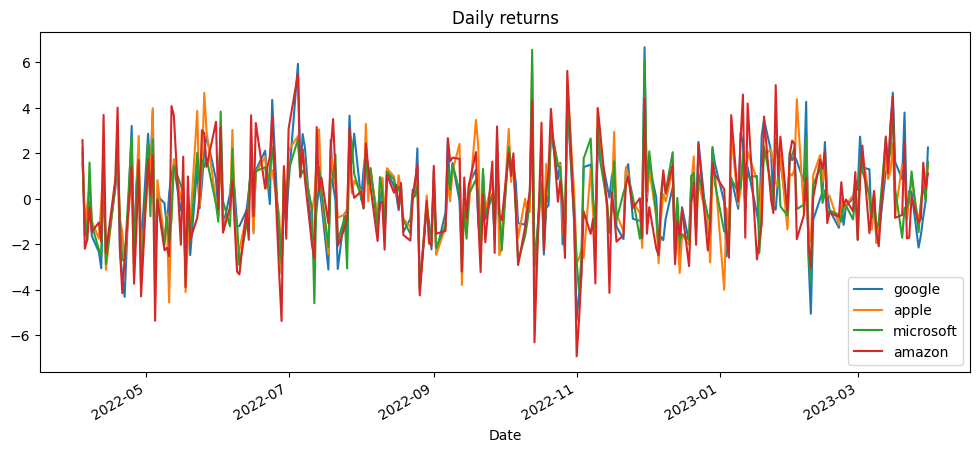

In [ ]:
#Change in stock's volume being traded overtime


grouped = data.groupby('Company')
fig, ax = plt.subplots(figsize=(12,5))

for comp in Companies:
    stock = grouped.get_group(comp)
    #print(stock["Company"].head(),stock["Date"].head())
    stock['daily_return %'].plot( legend=True,  ax=ax,  title="Daily returns" )
    #sns.lineplot(x=stock.index , y=stock['Daily returns'], ax=ax )

ax.legend(Companies)

<ipython-input-11-31fc684dedc5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stocks[tick]['Daily returns'].dropna(),bins=100,kde=False,ax=ax)


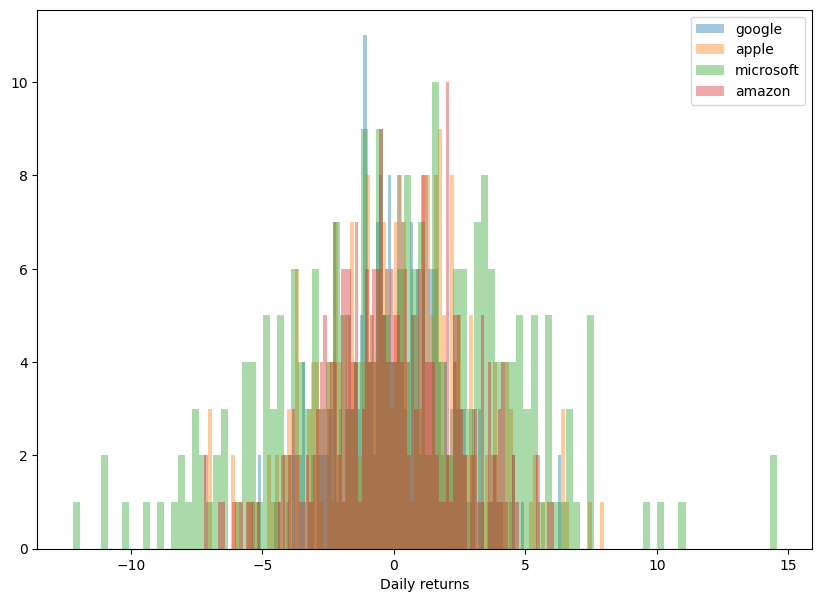

In [ ]:
f,ax=plt.subplots(figsize=(10,7))
for tick in ticker:
   sns.distplot(stocks[tick]['Daily returns'].dropna(),bins=100,kde=False,ax=ax)

ax.legend(Companies)

In [ ]:
import pandas as pd

def trends(weekly_returns):
    """
    Calculates trends based on the weekly returns of stocks.

    Args:
        weekly_returns (pd.Series): A Pandas Series object containing weekly returns of a stock.

    Returns:
        pd.Series: A Pandas Series object containing the trends for each week.
    """

    # Calculate the percentage change of the weekly returns.
    weekly_pct_change = weekly_returns.pct_change()

    # Create a dictionary mapping percentage change ranges to trend labels.
    trend_labels = {
        (-float('inf'), -4.0): 'Strongly Negative',
        (-4.0, -2): 'Moderately Negative',
        (-2.0, -0.1): 'Slightly Negative',
        (-0.1, 0.1): 'No Change',
        (0.1,2.0): 'Slightly Positive',
        (2.0, 4.0): 'Moderately Positive',
        (4.0, float('inf')): 'Strongly Positive'
    }

    # Apply the trend label mapping to the percentage change of the weekly returns.
    trend_direction = pd.cut(weekly_pct_change, bins=[-float('inf'), -4.0, -2, -0.1 , 0.9, 2, 4 , float('inf')], labels=list(trend_labels.values()))

    # Create a Pandas Series object containing the trend direction for each week.
    trends = pd.Series(trend_direction, index=weekly_returns.index)

    return trends
for tick in ticker:
  stocks[tick]['Trend'] = trends(stocks[tick]["daily_return %"])


stocks['AMZN'].head()

data = update_data()

#data['Trend'].fillna('No Change')
data.dropna(subset=['Trend'])
data.head(10)
#data['Trend'].isna().sum()


,Open,High,Low,Close,Adj Close,Volume,Company,ma_for_10_days,ma_for_25_days,ma_for_50_days,Daily returns,daily_return %,Trend
Date,,,,,,,,,,,,,
2022-04-04,140.824493,144.043747,140.824493,143.642502,143.642502,19076000,google,NaN,NaN,NaN,2.818008,2.001078,NaN
2022-04-05,143.399506,143.589996,140.943497,141.063004,141.063004,19256000,google,NaN,NaN,NaN,-2.336502,-1.629366,Slightly Negative
2022-04-06,139.161499,139.848495,136.418106,137.175995,137.175995,23574000,google,NaN,NaN,NaN,-1.985504,-1.426763,Slightly Negative
2022-04-07,136.617996,137.701508,134.857254,136.464996,136.464996,19448000,google,NaN,NaN,NaN,-0.153000,-0.111991,Slightly Negative
2022-04-08,136.250000,136.250000,133.752502,134.010498,134.010498,16434000,google,NaN,NaN,NaN,-2.239502,-1.643671,Strongly Positive
2022-04-11,132.899994,132.939194,129.617493,129.796494,129.796494,24188000,google,NaN,NaN,NaN,-3.103500,-2.335215,No Change
2022-04-12,132.423492,132.423492,127.575996,128.374496,128.374496,23004000,google,NaN,NaN,NaN,-4.048996,-3.057612,No Change
2022-04-13,128.626495,130.655746,128.438599,130.285995,130.285995,19542000,google,NaN,NaN,NaN,1.659500,1.290170,Slightly Negative
2022-04-14,130.649506,130.710251,127.111504,127.252998,127.252998,23484000,google,NaN,NaN,NaN,-3.396507,-2.599709,Moderately Negative


In [ ]:
data['Trend'] = data['Trend'].fillna(method='bfill',axis=0)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Company,ma_for_10_days,ma_for_25_days,ma_for_50_days,Daily returns,daily_return %,Trend
Date,,,,,,,,,,,,,
2022-04-04,140.824493,144.043747,140.824493,143.642502,143.642502,19076000,google,NaN,NaN,NaN,2.818008,2.001078,Slightly Negative
2022-04-05,143.399506,143.589996,140.943497,141.063004,141.063004,19256000,google,NaN,NaN,NaN,-2.336502,-1.629366,Slightly Negative
2022-04-06,139.161499,139.848495,136.418106,137.175995,137.175995,23574000,google,NaN,NaN,NaN,-1.985504,-1.426763,Slightly Negative
2022-04-07,136.617996,137.701508,134.857254,136.464996,136.464996,19448000,google,NaN,NaN,NaN,-0.153000,-0.111991,Slightly Negative
2022-04-08,136.250000,136.250000,133.752502,134.010498,134.010498,16434000,google,NaN,NaN,NaN,-2.239502,-1.643671,Strongly Positive


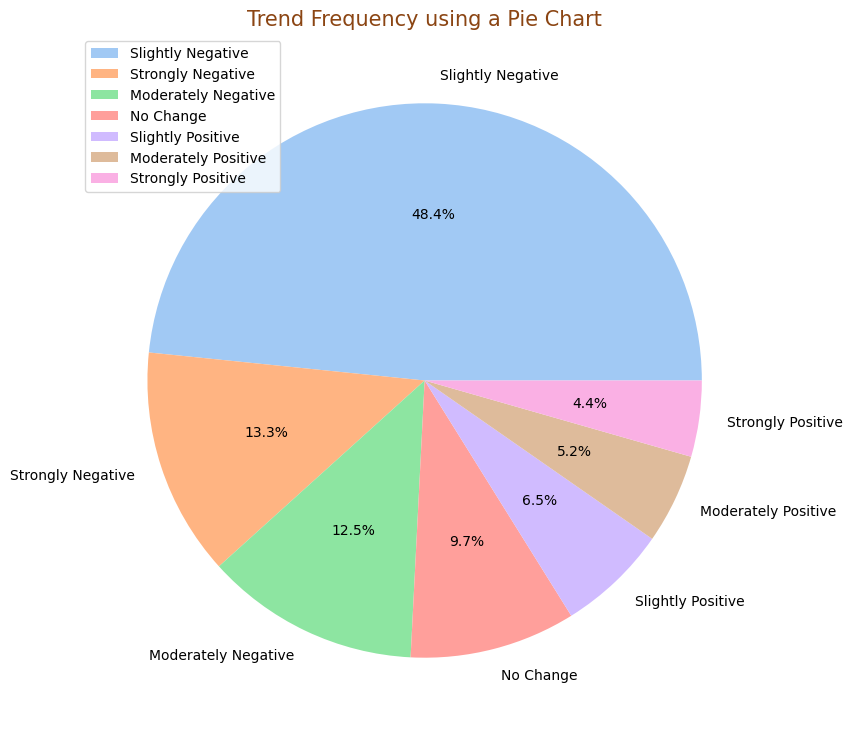

In [ ]:
#Pie Chart visulization of Trends of daily returns

import plotly.graph_objects as go

#print(stocks['AMZN'].head())
labels=stocks['AAPL'].Trend.value_counts().index
colors=sns.color_palette('pastel')
sizes=stocks['AAPL'].Trend.value_counts().values
#print(sizes)
plt.figure(figsize=(9,9))
plt.pie(sizes,labels=labels,colors=colors, autopct='%1.1f%%')
#df = data.query("Company == 'microsoft'")
#df =data.query("Company == 'amazon'")
#df
#df.fillna('No Change')
#fig = go.Figure(data=[go.Pie(labels=df['Trend'], values=df['daily_return %'], textinfo='label+percent',insidetextorientation='radial')])
#fig.show()
plt.title("Trend Frequency using a Pie Chart",color="saddlebrown",fontsize=15)
#patches, texts, auto = ax1.pie(sizes, colors=colors, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )
 
#plt.legend(patches, labels, loc="best")
plt.legend(loc = "upper left")
plt.show()


In [ ]:
all_adj = pd.concat([stocks['AAPL']['Adj Close'] ,stocks['GOOG']['Adj Close'],stocks['AMZN']['Adj Close'],stocks['MSFT']['Adj Close']], axis = 1)
all_adj.columns = ['Apple','Google','Amazon','Microsoft']
all_adj

,Apple,Google,Amazon,Microsoft
Date,,,,
2022-04-04,177.365585,143.642502,168.346497,311.910065
2022-04-05,174.005936,141.063004,164.054993,307.859802
2022-04-06,170.795364,137.175995,158.755997,296.590332
2022-04-07,171.103516,136.464996,157.784500,298.442200
2022-04-08,169.065842,134.010498,154.460495,294.084930
...,...,...,...,...
2023-03-27,158.279999,103.059998,98.040001,276.380005
2023-03-28,157.649994,101.360001,97.239998,275.230011
2023-03-29,160.770004,101.900002,100.250000,280.510010


<Axes: >

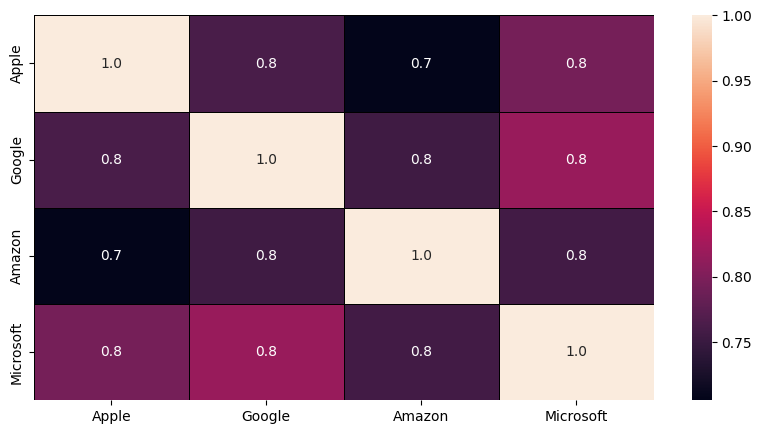

In [ ]:
pct_df = all_adj.pct_change()
pct_df.tail()
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(pct_df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax) 

**INFERENCE**:
Except for correlation between amazon and apple , all other tech companies stocks are equally correlated